In [1]:
import sys
sys.path.append("..\..")

import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from src.data.datasets.overlaps import OverlapsDataset

In [2]:
train_dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet", split="train")
test_dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet", split="test")

Extracting non-overlapping features: 100%|██████████| 126/126 [00:03<00:00, 32.16it/s]


In [3]:
classifier = LDA()

In [4]:
X_train = train_dataset.features
X_test = test_dataset.features
y_train = train_dataset.targets
y_test = test_dataset.targets

In [5]:
classifier.fit(X_train, y_train)

LinearDiscriminantAnalysis()

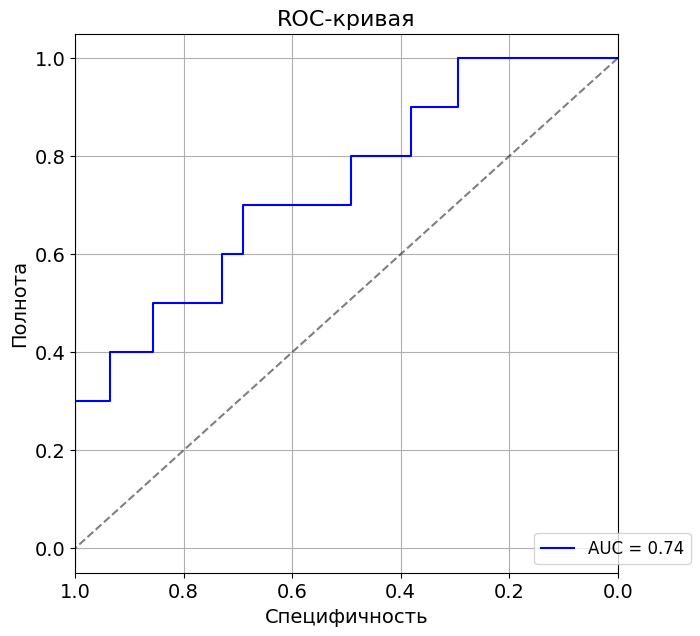

In [6]:
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))

plt.plot(1-fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [1, 0], color="black", linestyle="--", alpha=0.5)
plt.xlabel("Специфичность", fontsize=14)
plt.ylabel("Полнота", fontsize=14)
plt.xlim((1, 0))
plt.legend(loc="lower right", bbox_to_anchor=(1.15, 0), fontsize=12)
plt.grid(True)
plt.title("ROC-кривая", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)